In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
revDF = pd.read_csv("C:\\Users\\admin\\Desktop\\Campus Hackathon\\train.csv")
revDF.drop(columns="session_id", inplace=True)
revDF.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,Nov,2,2,3,2,Returning_Visitor,False,0
1,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,Dec,3,2,6,3,Returning_Visitor,False,0
2,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,Nov,2,2,1,20,Returning_Visitor,False,0
3,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,Nov,2,2,1,2,Returning_Visitor,True,1
4,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,Dec,3,2,5,2,Returning_Visitor,False,0


In [3]:
revDF.describe(include="all")

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,6,11,NaN,15,3,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,2,2,NaN,2,Returning_Visitor,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11048,21638,25540,NaN,12545,34496,31053,NaN
mean,2.544150,89.794383,0.555225,40.977236,34.026975,1148.105672,0.021969,0.042307,6.494963,0.063553,NaN,NaN,NaN,3.241975,NaN,NaN,NaN,0.158275
std,3.667252,182.964645,1.332627,153.114387,46.798102,1666.181462,0.048533,0.048633,17.710646,0.199463,NaN,NaN,NaN,2.423586,NaN,NaN,NaN,0.365003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.883333,0.000000,0.013389,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000
50%,1.000000,11.200000,0.000000,0.000000,19.000000,560.075000,0.003304,0.025000,0.000000,0.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000
75%,4.000000,110.154167,0.000000,0.000000,41.000000,1420.536667,0.016667,0.050000,0.000000,0.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000


In [4]:
revDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           40000 non-null  int64  
 1   administrative_duration  40000 non-null  float64
 2   informational            40000 non-null  int64  
 3   informational_duration   40000 non-null  float64
 4   productrelated           40000 non-null  int64  
 5   productrelated_duration  40000 non-null  float64
 6   bouncerates              40000 non-null  float64
 7   exitrates                40000 non-null  float64
 8   pagevalues               40000 non-null  float64
 9   specialday               40000 non-null  float64
 10  month                    40000 non-null  object 
 11  operatingsystems         40000 non-null  object 
 12  browser                  40000 non-null  object 
 13  region                   40000 non-null  int64  
 14  traffictype           

<AxesSubplot:>

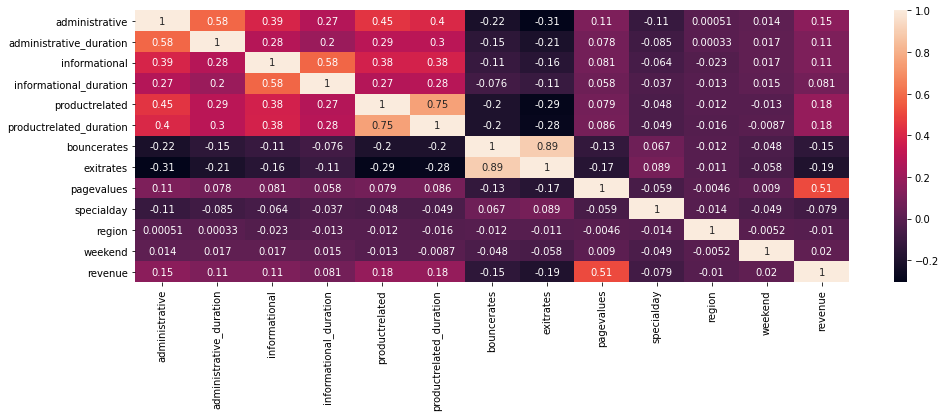

In [5]:
plt.figure(figsize = (16,5))
sns.heatmap(revDF.corr(), annot=True)

In [6]:
revDF = revDF.replace(to_replace="*",value=0)
clmns = ['month','visitortype','weekend']
revDF[clmns] = revDF[clmns].apply(LabelEncoder().fit_transform)

In [7]:
X = revDF.drop(columns="revenue")
y = revDF["revenue"]
# X
# y

[0.0490707  0.04532596 0.0276907  0.02711865 0.06512449 0.06474069
 0.05111354 0.06652195 0.37807722 0.00786789 0.04644234 0.02945706
 0.02978731 0.04082032 0.04106559 0.01515757 0.01461802]


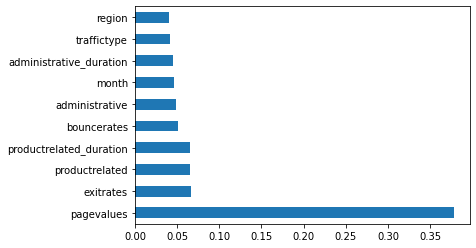

In [8]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_curve

In [12]:
def get_model_metrics(actual, predicted, classifier_name):
  acc = accuracy_score(actual, predicted)
  f1 = f1_score(actual, predicted)
  tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
  sensitivity = tp / (tp + fn)
  specificity = tn / (tn + fp)
  fpr, tpr, thresholds = roc_curve(actual, predicted, pos_label=1)
  auc_value = auc(fpr, tpr)
  return {'accuracy': acc,
          'f1-score': f1,
          'classifier': classifier_name,
          'sensitivity': sensitivity,
          'specificity': specificity,
          'AUC': auc_value,
          'fpr_values': fpr,
          'tpr_values': tpr}

In [13]:
res_cols = ['classifier', 'f1-score', 'sensitivity', 'specificity', 'AUC', 'accuracy']
df_results = pd.DataFrame(columns=res_cols)

# ***Logistic Regression***

In [14]:
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
y_pred_lr = classifierLR.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
accuracy_score(y_test, y_pred_lr)

[[8206  237]
 [ 991  566]]


0.8772

In [18]:
lg_metrics = get_model_metrics(y_test, y_pred_lr, classifierLR)
print(lg_metrics)
if classifierLR not in df_results['classifier'].values:
    df_results = df_results.append(lg_metrics, ignore_index=True)

{'accuracy': 0.8772, 'f1-score': 0.47966101694915264, 'classifier': LogisticRegression(random_state=0), 'sensitivity': 0.363519588953115, 'specificity': 0.9719294089778515, 'AUC': 0.6677244989654831, 'fpr_values': array([0.        , 0.02807059, 1.        ]), 'tpr_values': array([0.        , 0.36351959, 1.        ])}


# ***K-Nearest Neighbour***

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifierKnn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKnn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred_knn = classifierKnn.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
accuracy_score(y_test, y_pred_knn)

[[8087  356]
 [ 908  649]]


0.8736

In [27]:
knn_metrics = get_model_metrics(y_test, y_pred_knn,classifierKnn )
print(knn_metrics)
if classifierKnn not in df_results['classifier'].values:
    df_results = df_results.append(knn_metrics, ignore_index=True)

{'accuracy': 0.8736, 'f1-score': 0.5066354410616706, 'classifier': KNeighborsClassifier(), 'sensitivity': 0.4168272318561336, 'specificity': 0.9578348928106123, 'AUC': 0.6873310623333729, 'fpr_values': array([0.        , 0.04216511, 1.        ]), 'tpr_values': array([0.        , 0.41682723, 1.        ])}


# ***Support Vector Classifier***

In [28]:
from sklearn.svm import SVC
classifierSvc = SVC(kernel = 'linear', random_state = 0)
classifierSvc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [29]:
y_pred_svc = classifierSvc.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)
accuracy_score(y_test, y_pred_svc)

[[8174  269]
 [ 950  607]]


0.8781

In [31]:
svm_metrics = get_model_metrics(y_test, y_pred_svc, classifierSvc)
print(svm_metrics)
if classifierSvc not in df_results['classifier'].values:
    df_results = df_results.append(svm_metrics, ignore_index=True)

{'accuracy': 0.8781, 'f1-score': 0.4989724619810934, 'classifier': SVC(kernel='linear', random_state=0), 'sensitivity': 0.38985228002569045, 'specificity': 0.9681392869832998, 'AUC': 0.6789957835044951, 'fpr_values': array([0.        , 0.03186071, 1.        ]), 'tpr_values': array([0.        , 0.38985228, 1.        ])}


# ***Support Vector Classifier - Kernel***

In [32]:
from sklearn.svm import SVC
classifierSvcKer = SVC(kernel = 'rbf', random_state = 0)
classifierSvcKer.fit(X_train, y_train)

SVC(random_state=0)

In [33]:
y_pred_svcker = classifierSvcKer.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_svcker)
print(cm)
accuracy_score(y_test, y_pred_svcker)

[[8165  278]
 [ 800  757]]


0.8922

In [35]:
svmk_metrics = get_model_metrics(y_test, y_pred_svcker, classifierSvcKer)
print(svm_metrics)
if classifierSvcKer not in df_results['classifier'].values:
    df_results = df_results.append(svmk_metrics, ignore_index=True)

{'accuracy': 0.8781, 'f1-score': 0.4989724619810934, 'classifier': SVC(kernel='linear', random_state=0), 'sensitivity': 0.38985228002569045, 'specificity': 0.9681392869832998, 'AUC': 0.6789957835044951, 'fpr_values': array([0.        , 0.03186071, 1.        ]), 'tpr_values': array([0.        , 0.38985228, 1.        ])}


# ***Naive Bayes***

In [36]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

GaussianNB()

In [37]:
y_pred_nb = classifierNB.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)
accuracy_score(y_test, y_pred_nb)

[[6936 1507]
 [ 513 1044]]


0.798

In [40]:
nb_metrics = get_model_metrics(y_test, y_pred_nb, classifierNB)
print(nb_metrics)
if classifierNB not in df_results['classifier'].values:
    df_results = df_results.append(nb_metrics, ignore_index=True)

{'accuracy': 0.798, 'f1-score': 0.5082765335929893, 'classifier': GaussianNB(), 'sensitivity': 0.6705202312138728, 'specificity': 0.8215089423190809, 'AUC': 0.7460145867664769, 'fpr_values': array([0.        , 0.17849106, 1.        ]), 'tpr_values': array([0.        , 0.67052023, 1.        ])}


# ***Decision Tree Classifier***

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [20]:
y_pred_dt = classifierDT.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
accuracy_score(y_test, y_pred_dt)

[[7782  661]
 [ 667  890]]


0.8672

In [23]:
dt_metrics = get_model_metrics(y_test, y_pred_dt,classifierDT )
print(dt_metrics)
if classifierDT not in df_results['classifier'].values:
    df_results = df_results.append(dt_metrics, ignore_index=True)

{'accuracy': 0.8672, 'f1-score': 0.5727155727155727, 'classifier': DecisionTreeClassifier(criterion='entropy', random_state=0), 'sensitivity': 0.5716120745022479, 'specificity': 0.9217102925500414, 'AUC': 0.7466611835261446, 'fpr_values': array([0.        , 0.07828971, 1.        ]), 'tpr_values': array([0.        , 0.57161207, 1.        ])}


# ***Random Forest Classifier***

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifierRFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierRFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [42]:
y_pred_rfc = classifierRFC.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rfc)
print(cm)
accuracy_score(y_test, y_pred_rfc)

[[8110  333]
 [ 689  868]]


0.8978

In [45]:
rfc_metrics = get_model_metrics(y_test, y_pred_rfc,classifierRFC )
print(rfc_metrics)
if classifierRFC not in df_results['classifier'].values:
    df_results = df_results.append(rfc_metrics, ignore_index=True)

{'accuracy': 0.8978, 'f1-score': 0.6294416243654822, 'classifier': RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0), 'sensitivity': 0.5574823378291587, 'specificity': 0.9605590429941964, 'AUC': 0.7590206904116775, 'fpr_values': array([0.        , 0.03944096, 1.        ]), 'tpr_values': array([0.        , 0.55748234, 1.        ])}


<ipython-input-45-90845966add9>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if classifierRFC not in df_results['classifier'].values:
